# NLP EDA

Text Data Exploration Techniques

- [Term Frequency](#Term-Frequency)
- [Ngrams](#Ngrams)
- [Document Length](#Document-Length)
- [Word Cloud](#Word-Cloud)
- [Sentiment Analysis](#Sentiment-Analysis)

## Setup

In [2]:
from typing import List
import unicodedata
import re

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib default plotting styles
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 8))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

def clean(text: str) -> List[str]:
    "a simple function to prepare text data"
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words("english") + ["r", "u", "2", "ltgt"]
    text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
        .lower()
    )
    words = re.sub(r"[^\w\s]", "", text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

df = pd.read_csv("spam_clean.csv")

A quick data summary

In [3]:
df.shape

(5572, 2)

In [4]:
df.isna().sum()

label    0
text     0
dtype: int64

In [11]:
df.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


What percentage of the data is spam?

,n,percent
ham,4825,0.865937
spam,747,0.134063


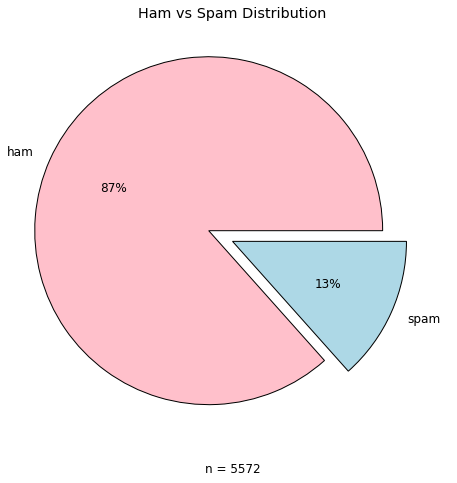

In [5]:
df.label.value_counts().plot.pie(
    colors=["pink", "lightblue"], explode=(0.15, 0), autopct="%.0f%%"
)
plt.title("Ham vs Spam Distribution")
plt.ylabel("")
plt.xlabel("n = %d" % df.shape[0])

pd.concat(
    [df.label.value_counts(), df.label.value_counts(normalize=True)], axis=1
).set_axis(["n", "percent"], axis=1, inplace=False)

## Term Frequency

In [6]:
pd.Series(" ".join(df.text).split()).value_counts()

to                       2134
you                      1622
I                        1466
a                        1327
the                      1197
and                       857
in                        798
is                        781
i                         742
u                         692
for                       644
my                        628
of                        591
your                      560
me                        557
on                        487
have                      474
2                         453
that                      421
are                       396
it                        396
call                      376
or                        373
be                        362
at                        359
with                      349
not                       340
will                      330
get                       326
can                       304
                         ... 
AccommodationVouchers       1
www.music-trivia.net        1
150p/msg, 

1. one big string for everything, spam, ham
1. lists of strings
1. list of strings -> pandas series so we can value count
1. combine series into single dataframe

In [7]:
all_text = " ".join(df.text)
spam_text = " ".join(df[df.label == "spam"].text)
ham_text = " ".join(df[df.label == "ham"].text)

In [17]:
pd.concat([pd.Series(all_text[:15]), pd.Series(spam_text[:15]), pd.Series(ham_text[:15])]).T.rename(columns={0: 'all', 1: 'spam', 2: 'ham'})

0    Go until jurong
0    Free entry in 2
0    Go until jurong
dtype: object

In [8]:
all_words = clean(all_text)
spam_words = clean(spam_text)
ham_words = clean(ham_text)

In [9]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()

In [18]:
tf = (
    pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
    .rename(columns={0: "all", 1: "ham", 2: "spam"})
    .fillna(0)
    .apply(lambda col: col.astype(int))
)

- most common words overall?
- most common spam, ham words?
- any words that uniquely spam or ham?

In [19]:
tf.sort_values(by="all").tail(10)

,all,ham,spam
know,267,241,26
free,275,59,216
ok,277,272,5
dont,279,257,22
4,287,168,119
go,304,273,31
ur,384,240,144
get,397,314,83
im,462,449,13
call,600,241,359


Text(0.5, 1.0, 'What are the most common words in all texts?')

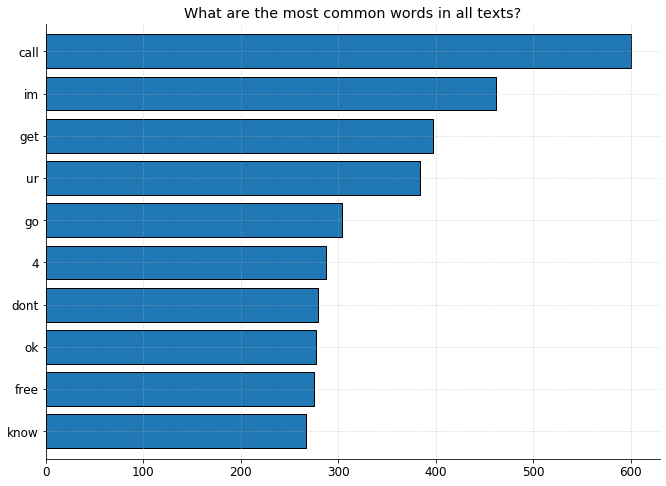

In [25]:
tf.sort_values(by='all')['all'].tail(10).plot.barh(width=.8)
plt.title('What are the most common words in all texts?')

Text(0.5, 1.0, 'What are the most common words in spam texts?')

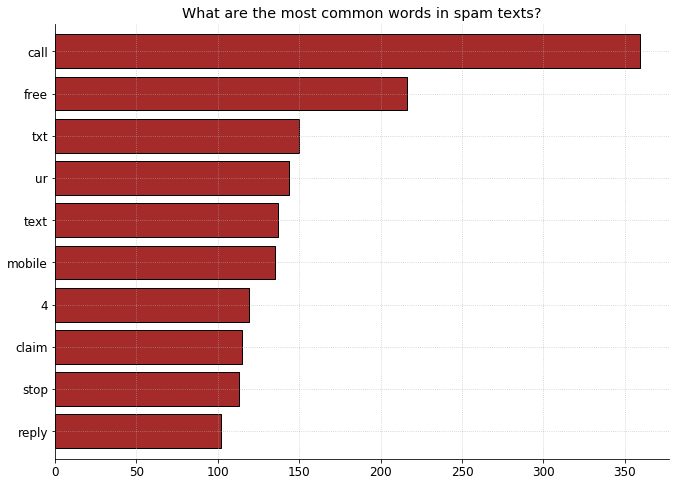

In [24]:
tf.sort_values(by='spam')['spam'].tail(10).plot.barh(width=.8, color='brown')
plt.title('What are the most common words in spam texts?')

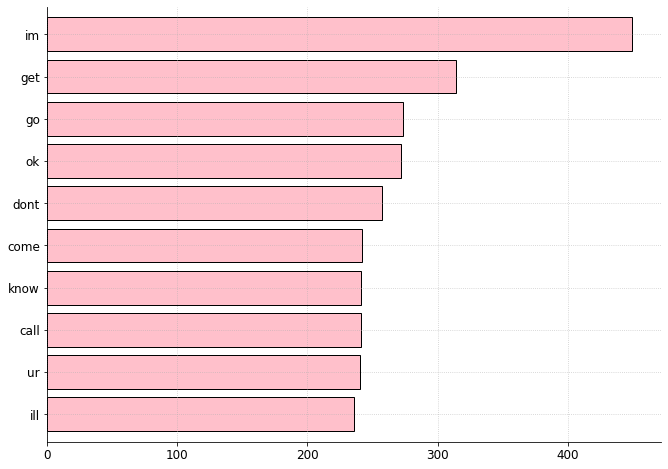

In [23]:
tf.sort_values(by='ham')['ham'].tail(10).plot.barh(width=.8, color='pink')
plt.title('What are the most common words in ham texts?')

## Ngrams

- bigrams + viz most frequent for all, spam, ham
- trigrams, etc

In [26]:
list(nltk.bigrams('I love the smell of regex in the morning'.split()))

[('I', 'love'),
 ('love', 'the'),
 ('the', 'smell'),
 ('smell', 'of'),
 ('of', 'regex'),
 ('regex', 'in'),
 ('in', 'the'),
 ('the', 'morning')]

In [28]:
list(nltk.ngrams('I love the smell of regex in the morning'.split(),3))

[('I', 'love', 'the'),
 ('love', 'the', 'smell'),
 ('the', 'smell', 'of'),
 ('smell', 'of', 'regex'),
 ('of', 'regex', 'in'),
 ('regex', 'in', 'the'),
 ('in', 'the', 'morning')]

In [29]:
pd.Series(nltk.bigrams(all_words)).value_counts()

(please, call)                                    53
(call, later)                                     52
(ill, call)                                       48
(let, know)                                       42
(sorry, ill)                                      39
(dont, know)                                      38
(new, year)                                       32
(good, morning)                                   31
(customer, service)                               29
(take, care)                                      26
(po, box)                                         25
(im, going)                                       24
(a1000, cash)                                     23
(guaranteed, call)                                23
(prize, guaranteed)                               22
(pls, send)                                       22
(ok, lor)                                         22
(every, week)                                     21
(4, ur)                                       

Text(0.5, 1.0, 'What are the most common bigrams in all texts?')

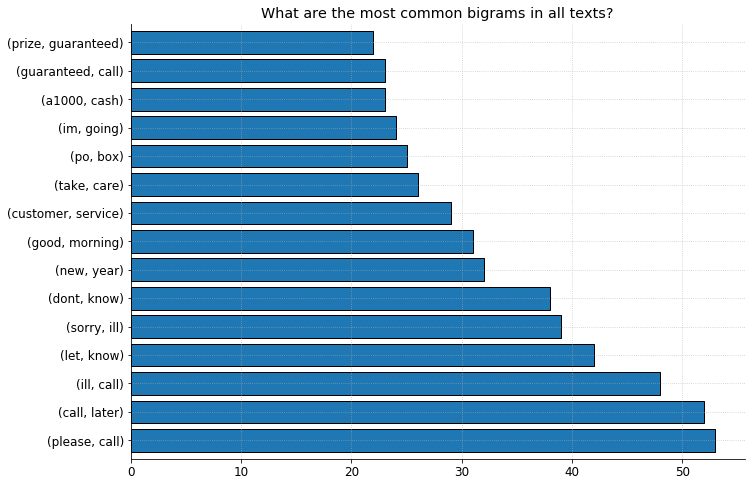

In [30]:
pd.Series(nltk.bigrams(all_words)).value_counts().head(15).plot.barh(width=.8)
plt.title('What are the most common bigrams in all texts?')

Text(0.5, 1.0, 'What are the most common bigrams in spam texts?')

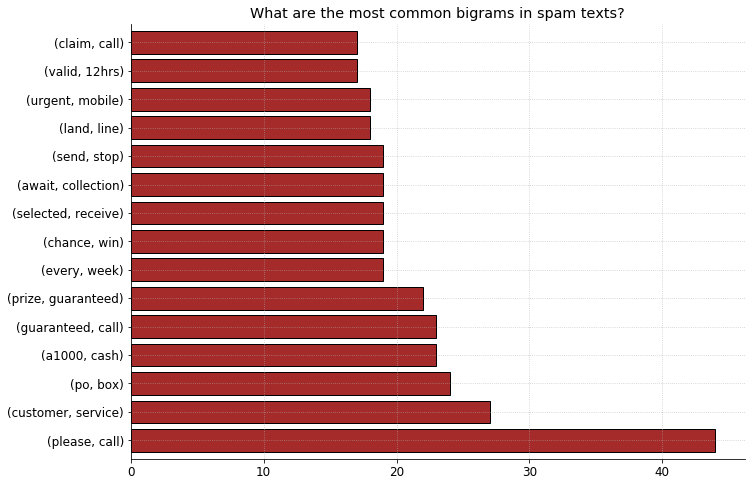

In [32]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(15).plot.barh(width=.8, color='brown')
plt.title('What are the most common bigrams in spam texts?')

Text(0.5, 1.0, 'What are the most common bigrams in ham texts?')

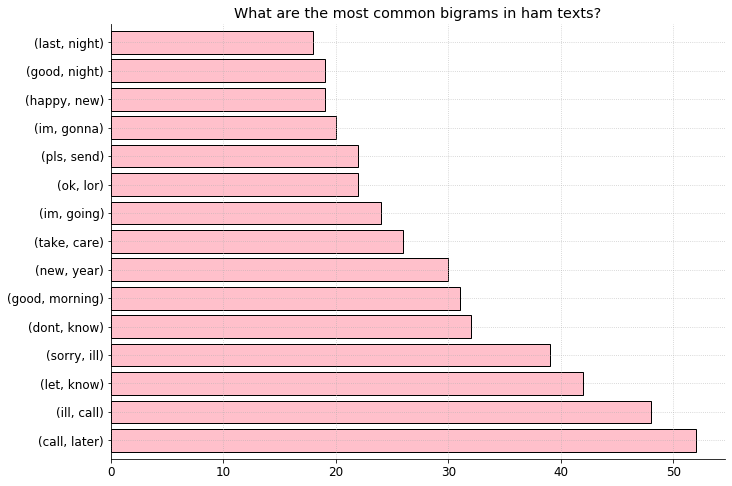

In [37]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(15).plot.barh(width=.8, color='pink')
plt.title('What are the most common bigrams in ham texts?')

Text(0.5, 1.0, 'What are the most common trigrams in all texts?')

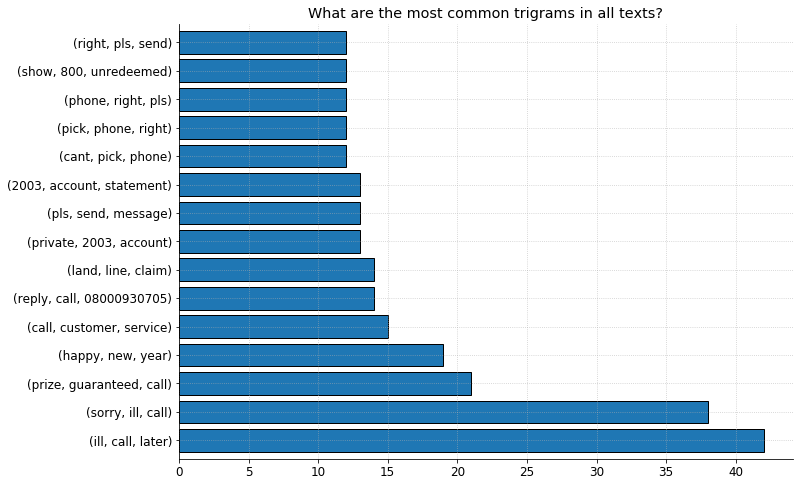

In [42]:
pd.Series(nltk.ngrams(all_words, 3)).value_counts().head(15).plot.barh(width=.8)
plt.title('What are the most common trigrams in all texts?')

Text(0.5, 1.0, 'What are the most common trigrams in spam texts?')

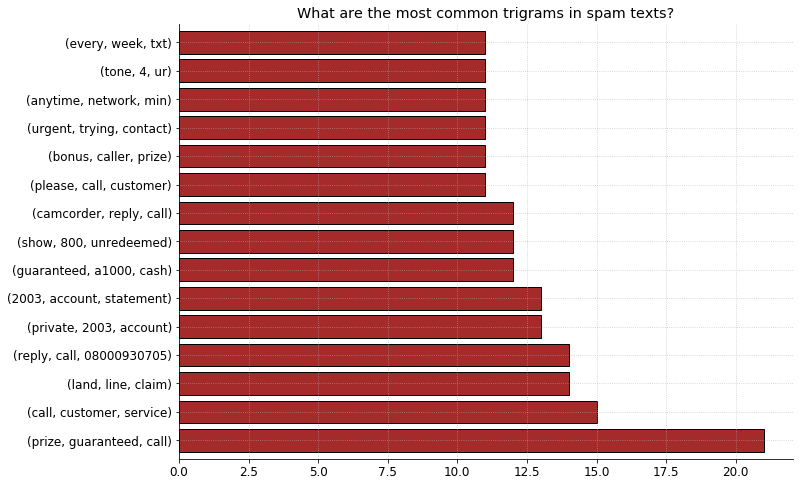

In [43]:
pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(15).plot.barh(width=.8, color='brown')
plt.title('What are the most common trigrams in spam texts?')

Text(0.5, 1.0, 'What are the most common trigrams in ham texts?')

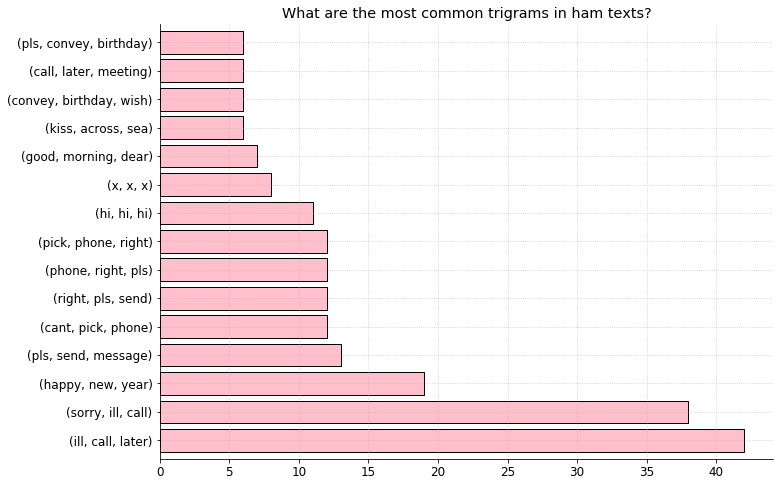

In [44]:
pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(15).plot.barh(width=.8, color='pink')
plt.title('What are the most common trigrams in ham texts?')

## Document Length

In [39]:
df["message_length"] = df.text.apply(len)

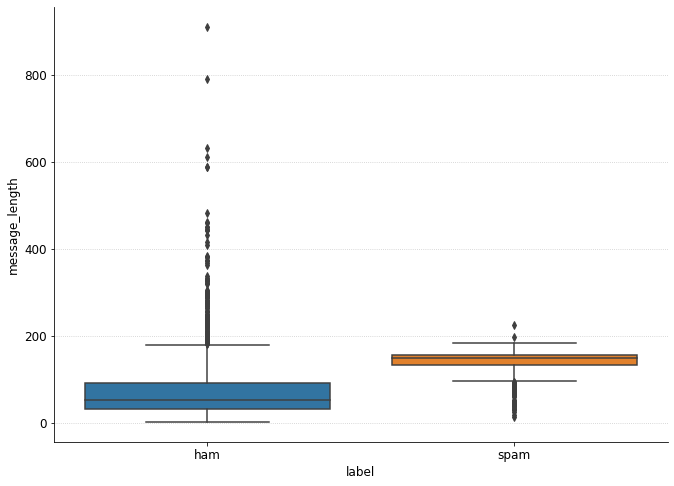

In [40]:
sns.boxplot(data=df, y="message_length", x="label")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fa05240>,
      dtype=object)

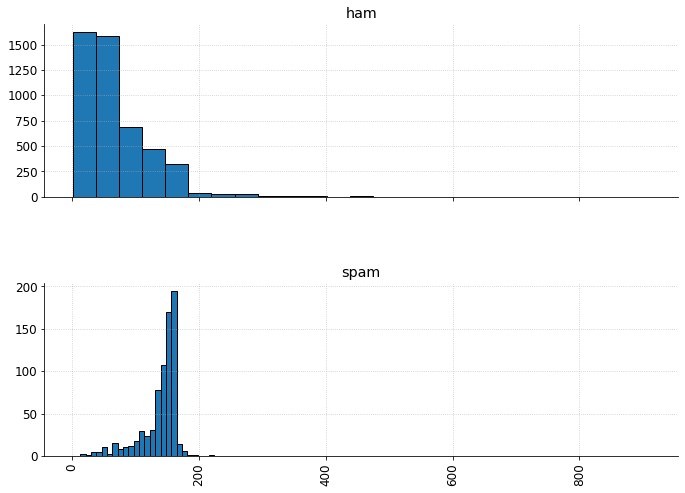

In [41]:
df.hist("message_length", by="label", sharex=True, layout=(2, 1), bins=25)

### Number of Words

In [45]:
df["n_words"] = df.text.str.count(r"\w+")

In [46]:
df.groupby("label").n_words.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,14.677098,11.738398,0.0,7.0,11.0,19.0,190.0
spam,747.0,25.821954,6.073204,2.0,24.0,27.0,30.0,40.0


Text(0.5, 0.98, 'Distribution of Number of Words for Spam and Ham Messages')

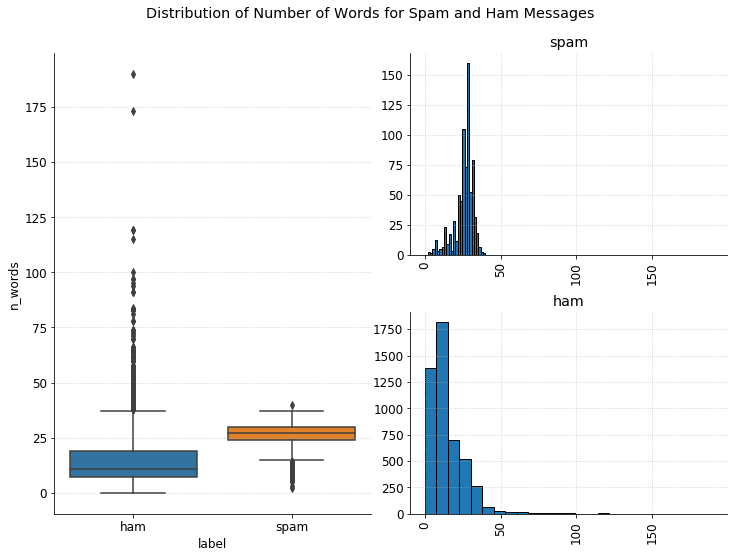

In [47]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.8])  # left, bottom, width, height
ax2 = fig.add_axes([0.55, 0.1, 0.4, 0.35])
ax3 = fig.add_axes([0.55, 0.55, 0.4, 0.35], sharex=ax2)
sns.boxplot(data=df, y="n_words", x="label", ax=ax1)
df.hist("n_words", by="label", bins=25, ax=[ax2, ax3])
fig.suptitle("Distribution of Number of Words for Spam and Ham Messages")

## Word Cloud

`WordCloud()` produces an image object, which can be displayed with `plt.imshow`

(-0.5, 1199.5, 799.5, -0.5)

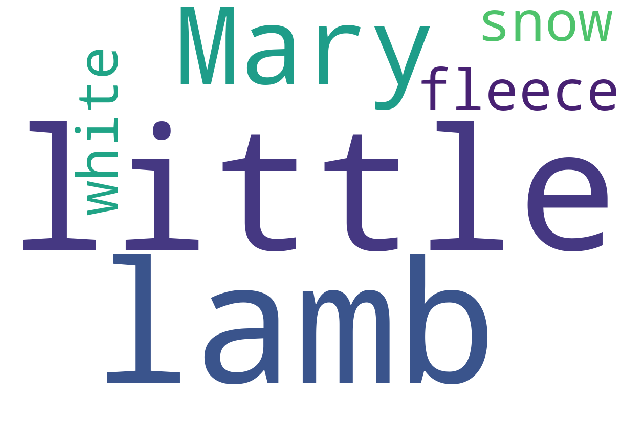

In [56]:
from wordcloud import WordCloud

sentence = (
    "Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow."
)
img = WordCloud(background_color="white", random_state=12345, height=800, width=1200).generate(sentence)
plt.imshow(img)
plt.axis("off")

do the same with all words, spam and ham

(-0.5, 1199.5, 799.5, -0.5)

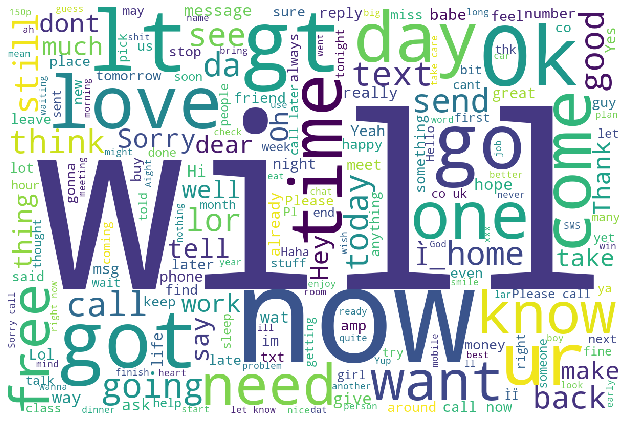

In [57]:
img = WordCloud(background_color="white", random_state=12345, height=800, width=1200).generate(all_text)
plt.imshow(img)
plt.axis("off")

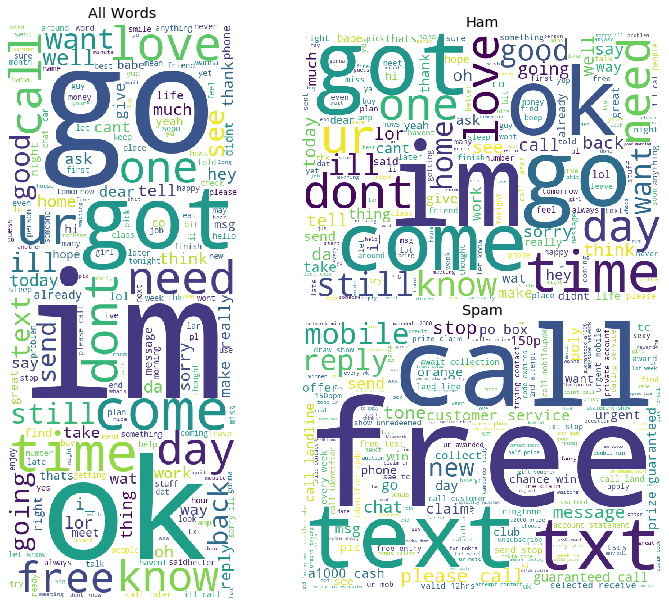

In [54]:
all_cloud = WordCloud(background_color="white", random_state=12345, height=1000, width=400).generate(
    " ".join(all_words)
)
ham_cloud = WordCloud(background_color="white", random_state=12345, height=600, width=800).generate(
    " ".join(ham_words)
)
spam_cloud = WordCloud(background_color="white", random_state=12345, height=600, width=800).generate(
    " ".join(spam_words)
)

plt.figure(figsize=(10, 8))
axs = [
    plt.axes([0, 0, 0.5, 1]),
    plt.axes([0.5, 0.5, 0.5, 0.5]),
    plt.axes([0.5, 0, 0.5, 0.5]),
]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title("All Words")
axs[1].set_title("Ham")
axs[2].set_title("Spam")

for ax in axs:
    ax.axis("off")

### Word Cloud with Bigrams

- `generate_from_frequencies` + python gymnastics

(-0.5, 1199.5, 799.5, -0.5)

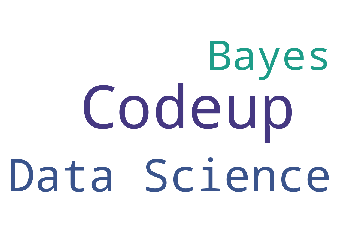

In [67]:
frequencies = {
    "Codeup": 10,
    "Bayes": 5,
    "Data Science": 6,
}

img = WordCloud(background_color="white", random_state=12345, height=800, width=1200).generate_from_frequencies(frequencies)
plt.figure(figsize=(6, 4))
plt.imshow(img)
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

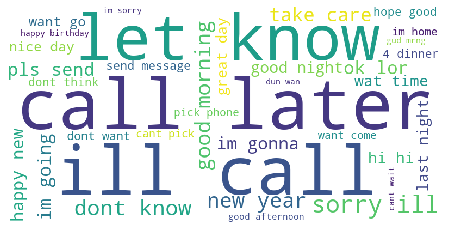

In [62]:
top_20_ham_bigrams = pd.Series(nltk.bigrams(ham_words)).value_counts().head(35)

data = {p1 + " " + p2: v for (p1, p2), v in top_20_ham_bigrams.to_dict().items()}

img = WordCloud(
    background_color="white", random_state=12345, width=800, height=400
).generate_from_frequencies(data)

plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis("off")

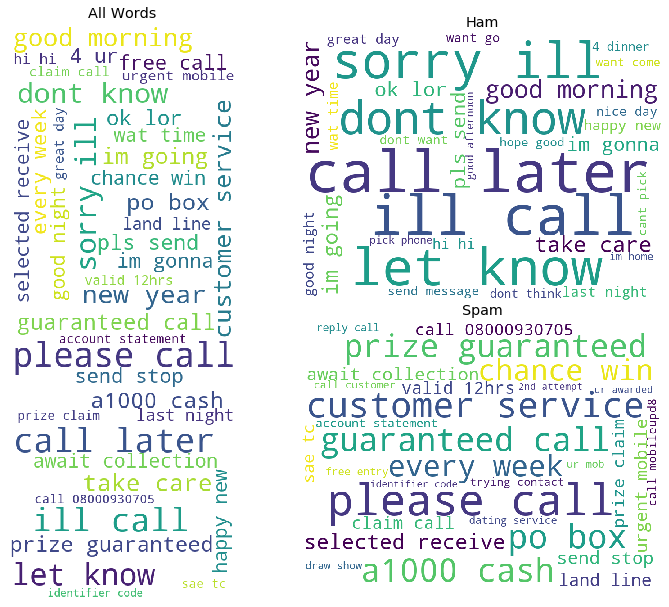

In [68]:
top_20_all_bigrams = pd.Series(nltk.bigrams(all_words)).value_counts().head(40)
all_data = {p1 + " " + p2: v for (p1, p2), v in top_20_all_bigrams.to_dict().items()}

top_20_spam_bigrams = pd.Series(nltk.bigrams(spam_words)).value_counts().head(30)
spam_data = {p1 + " " + p2: v for (p1, p2), v in top_20_spam_bigrams.to_dict().items()}

top_20_ham_bigrams = pd.Series(nltk.bigrams(ham_words)).value_counts().head(30)
ham_data = {p1 + " " + p2: v for (p1, p2), v in top_20_ham_bigrams.to_dict().items()}


all_cloud = (WordCloud(background_color="white", random_state=12345, height=1000, width=400)
             .generate_from_frequencies(all_data))
spam_cloud = (WordCloud(background_color="white", random_state=12345, height=600, width=800)
             .generate_from_frequencies(spam_data))
ham_cloud = (WordCloud(background_color="white", random_state=12345, height=600, width=800)
              .generate_from_frequencies(ham_data))

plt.figure(figsize=(10, 8))
axs = [
    plt.axes([0, 0, 0.5, 1]),
    plt.axes([0.5, 0.5, 0.5, 0.5]),
    plt.axes([0.5, 0, 0.5, 0.5]),
]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title("All Words")
axs[1].set_title("Ham")
axs[2].set_title("Spam")

for ax in axs:
    ax.axis("off")

## Sentiment Analysis

A way for us to put a number to indicate whether a document has a positive or
negative sentiment.

### Vader

In [70]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kevineliasen/nltk_data...


True

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [72]:
sia.polarity_scores("Sentiment analysis is very awesome!")

{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'compound': 0.6893}

In [73]:
sia.polarity_scores("I am pretty worried about bad weather this weekend.")

{'neg': 0.41, 'neu': 0.36, 'pos': 0.23, 'compound': -0.3612}

In [77]:
df["vader_sentiment"] = df.text.apply(lambda txt: sia.polarity_scores(txt)["compound"])

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,0.152262,0.392217,-0.9304,0.0,0.0000,0.4471,0.9975
spam,747.0,0.436018,0.466493,-0.7793,0.0,0.6107,0.8327,0.9753


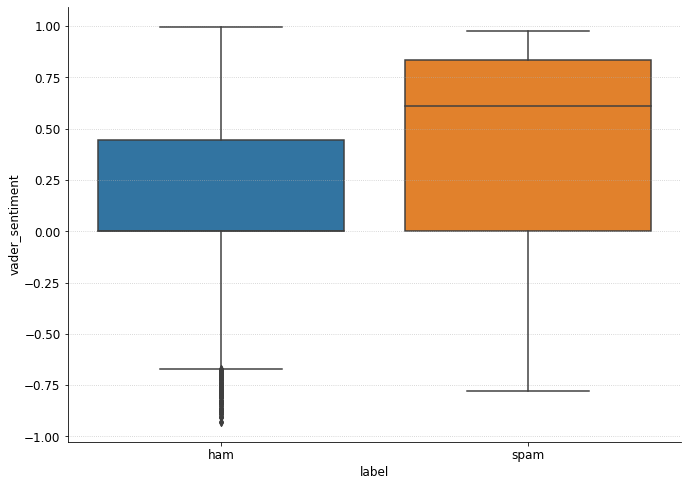

In [78]:
sns.boxplot(data=df, y="vader_sentiment", x="label")
df.groupby("label").vader_sentiment.describe()

### Afinn

In [79]:
from afinn import Afinn

sa = Afinn()

In [80]:
sa.score("Sentiment analysis is very awesome!")

4.0

In [81]:
sa.score("I am pretty worried about bad weather this weekend.")

-5.0

In [83]:
df["afinn_sentiment"] = df.text.apply(sa.score)

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,0.804767,2.983790,-13.0,0.0,0.0,2.0,50.0
spam,747.0,2.165997,3.033198,-7.0,0.0,2.0,4.0,18.0


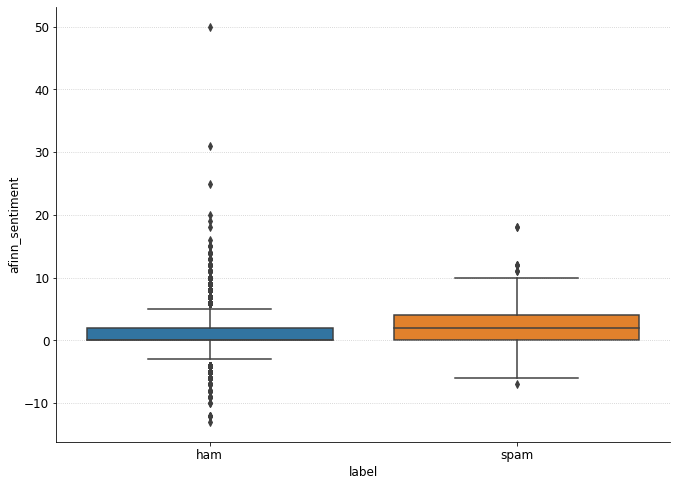

In [84]:
sns.boxplot(data=df, y="afinn_sentiment", x="label")
df.groupby("label").afinn_sentiment.describe()

In [75]:
bad_lyrics = """Your butt is mine
Gonna tell you right
Just show your face
In broad daylight
I'm telling you
On how I feel
Gonna hurt your mind
Don't shoot to kill
Come on
Come on
Lay it on me
All right
I'm giving you
On count of three
To show your stuff
Or let it be
I'm telling you
Just watch your mouth
I know your game
What you're about
Well they say the sky's the limit
And to me that's really true
But my friend you have seen nothin'
Just wait 'til I get through
Because I'm bad, I'm bad come on
You know I'm bad, I'm bad come on, you know
You know I'm bad, I'm bad come on, you know
And the whole world has to
Answer right now
Just to tell you once again
Who's bad
The word is out
You're doin' wrong
Gonna lock you up
Before too long
Your lyin' eyes
Gonna tell you right
So listen up
Don't make a fight
Your talk is cheap
You're not a man
You're throwin' stones
To hide your hands
But they say the sky's the limit
And to me that's really true
And my friends you have seen nothin'
Just wait 'til I get through
Because I'm bad, I'm bad come on
You know I'm bad, I'm bad come on, you know
You know I'm bad, I'm bad come on, you know
And the whole world has to
Answer right now
Just to tell you once again
Who's bad
We can change the world tomorrow
This could be a better place
If you don't like what I'm sayin'
Then won't you slap my face
Because I'm bad, I'm bad come on
You know I'm bad, I'm bad come on, you know
You know I'm bad, I'm bad come on, you know
And the whole world has to
Answer right now
Just to tell you once again
Who's bad
Because I'm bad, I'm bad come on
You know I'm bad, I'm bad come on, you know
You know I'm bad, I'm bad come on, you know
And the whole world has to
Answer right now
Just to tell you once again
Who's bad
Who's bad?"""

In [76]:
sia.polarity_scores(bad_lyrics)

{'neg': 0.248, 'neu': 0.691, 'pos': 0.061, 'compound': -0.998}

In [82]:
sa.score(bad_lyrics)

-85.0

In [86]:
call_me_maybe_lyrics = """I threw a wish in the well
Don't ask me I'll never tell
I looked at you as it fell
And now you're in my way
I'd trade my soul for a wish
Pennies and dimes for a kiss
I wasn't looking for this
But now you're in my way
Your stare was holding
Ripped jeans, skin was showin'
Hot night, wind was blowin'
Where you think you're going baby?
Hey, I just met you and this is crazy
But here's my number, so call me maybe
It's hard to look right at you baby
But here's my number, so call me maybe
Hey I just met you and this is crazy
But here's my number, so call me maybe
And all the other boys try to chase me
But here's my number, so call me maybe
You took your time with the call
I took no time with the fall
You gave me nothing at all
But still you're in my way
I beg and borrow and steal
At first sight and it's real
I didn't know I would feel it
But it's in my way
Your stare was holding
Ripped jeans, skin was showin'
Hot night, wind was blowin'
Where you think you're going baby?
Hey, I just met you and this is crazy
But here's my number, so call me maybe
It's hard to look right at you baby
But here's my number, so call me maybe
Hey I just met you and this is crazy
But here's my number, so call me maybe
And all the other boys try to chase me
But here's my number, so call me maybe
Before you came into my life
I missed you so bad
I missed you so bad
I missed you so so bad
Before you came into my life
I missed you so bad
And you should know that
I missed you so so bad
It's hard to look right at you baby
But here's my number, so call me maybe
Hey, I just met you and this is crazy
But here's my number, so call me maybe
And all the other boys try to chase me
But here's my number, so call me maybe
Before you came into my life
I missed you so bad
I missed you so bad
I missed you so so bad
Before you came into my life
I missed you so bad
And you should know that
So call me maybe"""

In [87]:
sia.polarity_scores(call_me_maybe_lyrics)

{'neg': 0.171, 'neu': 0.773, 'pos': 0.055, 'compound': -0.9949}

In [88]:
sa.score(call_me_maybe_lyrics)

-57.0

In [89]:
you_cant_touch_this="""You can't touch this
You can't touch this
You can't touch this (oh-oh oh oh oh-oh-oh)
You can't touch this (oh-oh oh oh oh-oh-oh)
My-my-my-my music makes me so hard makes me say oh my Lord
Thank you for blessing me with a mind to rhyme and two hype feet
That's good when you know you're down
A super dope homeboy from the Oaktown
And I'm known as such
And this is a beat uh u can't touch
I told you homeboy u can't touch this
Yeah that's how we're livin' and you know u can't touch this
Look in my eyes man u can't touch this
You know let me bust the funky lyrics u can't touch this
Fresh new kicks and pants
You got it like that now you know you wanna dance
So move out of your seat
And get a fly girl and catch this beat
While it's rollin' hold on pump a little bit
And let me know it's going on like that like that
Cold on a mission so pull on back
Let 'em know that you're too much
And this is a beat uh u can't touch
Yo I told you u can't touch this
Why you standing there man u can't touch this
Yo sound the bells school is in sucker u can't touch this
Give me a song or rhythm
Making 'em sweat that's what I'm giving 'em
Now they know when you talk about the Hammer
You talk about a show that's hyped and tight
Singers are sweatin' so pass them a mic
Or a tape to learn what it's gonna take
And now he's gonna burn
The charts legit either work hard
Or you might as well quit
That's word because you know
You can't touch this (oh-oh oh oh-oh-oh)
You can't touch this (oh-oh oh oh-oh-oh)
Break it down
(Oh-oh-oh-oh-oh-oh-oh-oh-oh oh-oh)
(Oh-oh-oh-oh-oh-oh-oh-oh-oh oh-oh)
Stop Hammer time
Go with the flow in a spin if you can't move to this
Then you probably are dead
So wave your hands in the air
Bust through the moves run your fingers through your hair
This is it for a winner
Dance to this and you're gonna get thinner
Move slide your rump
Just for a minute let's all do the bump
Bump bump bump yeah
Can't touch this
Look man u can't touch this
You'll probably get hyped boy 'cause you know you can't u can't touch this
Ring the bell school's back in break it down
(Oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh)
(Oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh)
Stop Hammer time
(Oh-oh oh oh oh-oh-oh)
(Oh-oh oh oh oh-oh-oh)
(Oh-oh oh-oh oh-oh oh-oh)
(Oh-oh oh oh oh-oh-oh) u can't touch this
(Oh-oh oh oh oh-oh-oh) u can't touch this
(Oh-oh oh oh oh-oh-oh) u can't touch this
(Oh-oh oh oh oh-oh-oh) break it down
(Oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh)
(Oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh)
Stop Hammer time
Every time you see me that Hammer's just so hype
I'm dope on the floor and I'm magic on the mic
Now why would I ever stop doing this
With others makin' records that just don't hit
I toured around the world from London to the bank
It's Hammer go Hammer
It's a Hammer yo Hammer and the rest go and play
You can't touch this (oh-oh oh oh-oh-oh)
You can't touch this (oh-oh oh oh-oh-oh)
Can't touch this (oh-oh oh-oh-oh)
Yeah u can't touch this
I told you u can't touch this (oh-oh oh-oh-oh)
Too hype can't touch this
Get me outta here u can't touch this
(Oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh)"""

In [90]:
sia.polarity_scores(you_cant_touch_this)

{'neg': 0.037, 'neu': 0.893, 'pos': 0.07, 'compound': 0.9577}

In [91]:
sa.score(you_cant_touch_this)

18.0

In [92]:
ice_ice_baby="""Yo, VIP, let's kick it!
Ice ice baby
Ice ice baby
All right stop
Collaborate and listen
Ice is back with my brand new invention
Something grabs a hold of me tightly
Then I flow that a harpoon daily and nightly
Will it ever stop?
Yo, I don't know
Turn off the lights and I'll glow
To the extreme, I rock a mic like a vandal
Light up a stage and wax a chump like a candle
Dance
Bum rush the speaker that booms
I'm killin' your brain like a poisonous mushroom
Deadly, when I play a dope melody
Anything less that the best is a felony
Love it or leave it
You better gain way
You better hit bull's eye
The kid don't play
If there was a problem
Yo, I'll solve it
Check out the hook while my DJ revolves it
Ice ice baby Vanilla
Ice ice baby Vanilla
Ice ice baby Vanilla
Ice ice baby Vanilla
Now that the party is jumping
With the bass kicked in, the fingers are pumpin'
Quick to the point, to the point no faking
I'm cooking MC's like a pound of bacon
Burning them if they're not quick and nimble
I go crazy when I hear a cymbal
And a hi hat with a souped up tempo
I'm on a roll and it's time to go solo
Rollin in my 5.0
With my ragtop down so my hair can blow
The girlies on standby
Waving just to say hi
Did you stop?
No, I just drove by
Kept on pursuing to the next stop
I busted a left and I'm heading to the next block
That block was dead
Yo so I continued to a1a Beachfront Ave
Girls were hot wearing less than bikinis
Rock man lovers driving Lamborghini
Jealous 'cause I'm out getting mine
Shay with a gauge and Vanilla with a nine
Ready for the chumps on the wall
The chumps are acting ill because they're so full of eight balls
Gunshots ranged out like a bell
I grabbed my nine
All I heard were shells
Fallin' on the concrete real fast
Jumped in my car, slammed on the gas
Bumper to bumper the avenue's packed
I'm tryin' to get away before the jackers jack
Police on the scene
You know what I mean
They passed me up, confronted all the dope fiends
If there was a problem
Yo, I'll solve it
Check out the hook while my DJ revolves it
Ice ice baby Vanilla
Ice ice baby Vanilla
Ice ice baby Vanilla
Ice ice baby Vanilla
Take heed, 'cause I'm a lyrical poet
Miami's on the scene just in case you didn't know it
My town, that created all the bass sound
Enough to shake and kick holes in the ground
'Cause my style's like a chemical spill
Feasible rhymes that you can vision and feel
Conducted and formed
This is a hell of a concept
We make it hype and you want to step with this
Shay plays on the fade, slice it like a ninja
Cut like a razor blade so fast
Other DJ's say, "damn"
If my rhyme was a drug
I'd sell it by the gram
Keep my composure when it's time to get loose
Magnetized by the mic while I kick my juice
If there was a problem
Yo, I'll solve it!
Check out the hook while my DJ revolves it
Ice ice baby Vanilla
Ice ice baby Vanilla
Ice ice baby Vanilla
Ice ice baby Vanilla
Yo man, let's get out of here
Word to your mother
Ice ice baby
Too cold
Ice ice baby
Too cold too cold
Ice ice baby
Too cold too cold
Ice ice baby
Too cold too cold"""

In [93]:
sia.polarity_scores(ice_ice_baby)

{'neg': 0.096, 'neu': 0.801, 'pos': 0.104, 'compound': 0.6265}

In [94]:
sa.score(ice_ice_baby)

-10.0

## Further Reading

- [VADER Sentiment Analysis](https://github.com/cjhutto/vaderSentiment)
- [AFINN Sentiment Analysis](https://github.com/fnielsen/afinn)

## Other NLP Libraries

- [spaCy](https://spacy.io/)
- [textacy](https://chartbeat-labs.github.io/textacy/) builds on top of spaCy
- [TextBlob](https://textblob.readthedocs.io/en/dev/)

## Bonus Exercises

After you've worked through the exercises in the curriculum,

- Use sentiment analysis to explore your datasets. Which news category has the highest sentiment? Which has the lowest? Does this match with what you might predict?

- Create a feature named `has_long_words`. This should be either true or false depending on whether or not the message contains a word greater than 5 characters. Use this feature to explore spam v ham. What changes if you change the cutoff from 5 to 8 characters?

- Explore the enron spam email dataset

    Download [the json file located here](https://ds.codeup.com/enron_spam.json.gz) and read it with pandas:
    
    We have done a little preprocessing and acquisition of the [data found in this kaggle competition](https://www.kaggle.com/wanderfj/enron-spam) to make it easier to work with.
    
    ```python
    df = pd.read_json("enron_spam.json.gz")
    ```
    
    Start by focusing just on the `label`, `subject`, and `text` columns.